# Chapter 11 - GOD SPIKED THE INTEGERS

In [1]:
library(rethinking)

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.7, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Loading required package: cmdstanr

This is cmdstanr version 0.5.3

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan

Loading required package: parallel

rethinking (Version 2.21)


Attaching package: ‘rethinking’


The following object is masked from ‘package:rstan’:

    stan


The following object is masked from ‘package:stats’:

    rstudent




## 11E1. 

**If an event has probability 0.35, what are the log-odds of this event?**


In [2]:
# log-odds = log(p/(1-p))
log(0.35/0.65)

[1] -0.6190392

## 11E2.

**If an event has log-odds 3.2, what is the probability of this event?**

In [3]:
# log(p/1-p) = 3.2
# exp(3.2) = p/(1-p)
# (1-p)exp(3.2) = p
# exp(3.2) = p(1+exp(3.2))
# p = exp(3.2)/(1+exp(3.2))

exp(3.2)/(1+exp(3.2))

[1] 0.9608343

## 11E3.

**Suppose that a coefficient in a logistic regression has value 1.7. What does this imply about the proportional change in odds of the outcome?**


if the predicator increases by 1, then the outcome increases by exp(1.7)

## 11E4.

**Why do Poisson regressions sometimes require the use of an offset? Provide an example.**

Log of the _exposure_ is an offset. As the $\lambda$ can be seen as a rate of counts, the time/distance across which this rate is calculated is called the _exposure_. This allows different exposures of counts to be compared in one model. In the example provided in the book, two monastaries have different counts of manuscripts (across week or day) 

##  11M1
**As explained in the chapter, binomial data can be organized in aggregated and disaggregated forms, without any impact on inference. But the likelihood of the data does change when the data are converted between the two formats. Can you explain why?**

In single trial, the likelihood is $\frac{n!}{(n-k)!k!}p^k(1-p)^{n-k}$, and for an aggregated binomial, if we don't care about the order of the outcomes, then the likelihood is $p^k(1-p)^{n-k}$, as the first term is just a constant, it does not affect our inference and the likelihood in the model

## 11M2

**If a coefficient in a Poisson regression has value 1.7, what does this imply about the change in the outcome?**

if this coefficient changes by 1, then the log of the rate $\lambda$ will change by 1.7, so $\lambda$ will change by $\exp(1.7)$. 

this is because we usually use the log link for Poisson models

## 11M3

**Explain why the logit link is appropriate for a binomial generalized linear model**

Because it maps continous values of a linear model to probability space [0,1]

## 11M4

**Explain why the log link is appropriate for a Poisson generalized linear model**

because it ensures the rate $\lambda$ is always positive

## 11M5

**What would it imply to use a logit link for the mean of a Poisson GLM? Can you think of a real research problem for which this will make sense?**

So it would mean to have

$logit(\lambda) = \log(\frac{\lambda}{1-\lambda}) = \alpha + \beta*x$ 

So somehow the predicators will affect the rate of counts, and it seems that $\lambda$ is then restricted to between [0,1] because we cannot have $\lambda \geq 1$. 

I mean you can have certain processes that produces less than 1 unit of things with a given time/distance. Say in the monastory case you can say, instead of producing one manuscript, producing a fraction of an entire bible day. 

Apparently you can also set the maximum number, instead of 1, to M, so 

$logit(\lambda) = \log(\frac{\lambda}{M-\lambda}) = \alpha + \beta*x$ 

If M is large, then the probability is low, and we can use Poisson here. Otherwise a binomial will be more appropriate

## 11M6

**State the constraints for which the binomial and the Poisson distributions have maximum entropy. Are the constraints different at all for binomial and Poisson? Why or Why not?**

Poisson and Binomial should have the same constraints since they are the same (Poisson being an special case of the binomial distribution)

The expected outcome is the mean, the n and p are discrete, constant probability of events across trials. 

_Note: maximum entropy distribution means that under certain contraints (as stated above for binomial) this distribution is the most plausible distribution_

In overthinking box on p. 312 there is a derivation for binomial distribution as the maximum entropy

## 11M7

Use `quap` to construct a quadratic approximate posterior distribution for the chimpanzee model that includes a unique intercept for each actor, `m11.4` (page 330). Compare the quadratic approx. to the posterior distribution produced instead from MCMC. Can you explain the differences and the similarities between the approx. and the MCMC distributions? Relax the prior on the actor intercepts to Normal(0, 10). Re-estimate the posterior using both `ulam` and `quap` Do the differences increase or decrease? Why?

In [4]:
data(chimpanzees)
d <- chimpanzees

In [5]:
d$treatment <- 1 + d$prosoc_left + 2*d$condition

In [6]:
head(d)

,actor,recipient,condition,block,trial,prosoc_left,chose_prosoc,pulled_left,treatment
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,NA,0,1,2,0,1,0,1
2,1,NA,0,1,4,0,0,1,1
3,1,NA,0,1,6,1,0,0,2
4,1,NA,0,1,8,0,1,0,1
5,1,NA,0,1,10,1,1,1,2
6,1,NA,0,1,12,1,1,1,2


In [7]:
dat_list <- list(
    pulled_left = d$pulled_left,
    actor = d$actor,
    treatment = as.integer(d$treatment) )

In [12]:
set_cmdstan_path(path = '~/learning/cmdstan/')

CmdStan path set to: /Users/jingfei.yu/learning/cmdstan



In [13]:
m11.4 <- ulam(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list , chains=4 , log_lik=TRUE )

Warning message in readLines(hpp_path):
“incomplete final line found on '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T//RtmpsIfrDA/model-8fbf7e56498d.hpp'”
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7e56498d.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7e56498d.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7e56498d.stan', line 4, column 4:

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.4 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

In [16]:
precis(m11.4, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.45721276,0.3148775,-0.94151768,0.04730556,539.9610,1.0049684
a[2],3.90018408,0.7644576,2.81363415,5.20684760,1342.4193,1.0005253
a[3],-0.75818115,0.3223699,-1.25955835,-0.23361286,666.2649,1.0026689
a[4],-0.75536722,0.3320000,-1.29533085,-0.21533004,530.5441,1.0051427
a[5],-0.46232238,0.3205078,-0.98789625,0.04361272,596.2661,1.0054907
a[6],0.46520840,0.3306841,-0.07866268,1.00227890,515.3978,1.0034741
a[7],1.94637081,0.4098769,1.30746035,2.62842475,829.0170,0.9997682
b[1],-0.03045482,0.2839028,-0.48836437,0.42657167,577.5263,1.0062392
b[2],0.49040635,0.2803919,0.04191742,0.94556586,572.5098,1.0046177


In [14]:
m11.4_quap <- quap(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list)

In [17]:
precis(m11.4_quap, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.43921069,0.3276017,-0.96278151,0.08436013
a[2],3.70602014,0.7217414,2.55253791,4.85950237
a[3],-0.73275903,0.3329757,-1.26491849,-0.20059957
a[4],-0.73275783,0.3329757,-1.26491725,-0.20059842
a[5],-0.43921198,0.3276017,-0.96278283,0.08435886
a[6],0.46894421,0.3317747,-0.06129588,0.99918430
a[7],1.90505068,0.4136432,1.24396901,2.56613235
b[1],-0.04065383,0.2837319,-0.49411215,0.41280449
b[2],0.47214802,0.2842162,0.01791558,0.92638046


Everything looks very similar

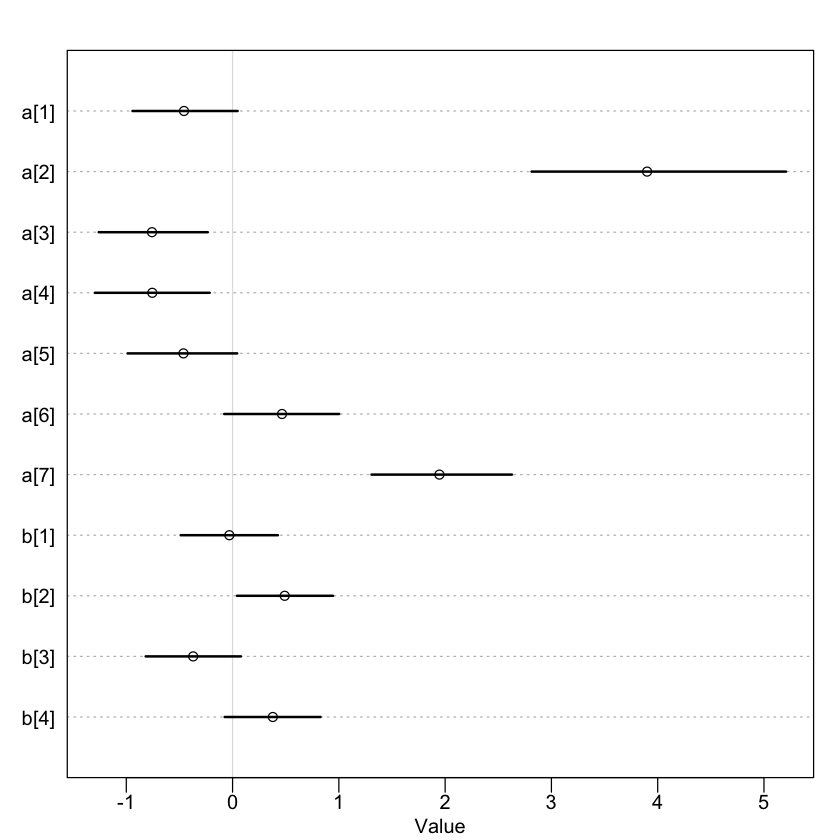

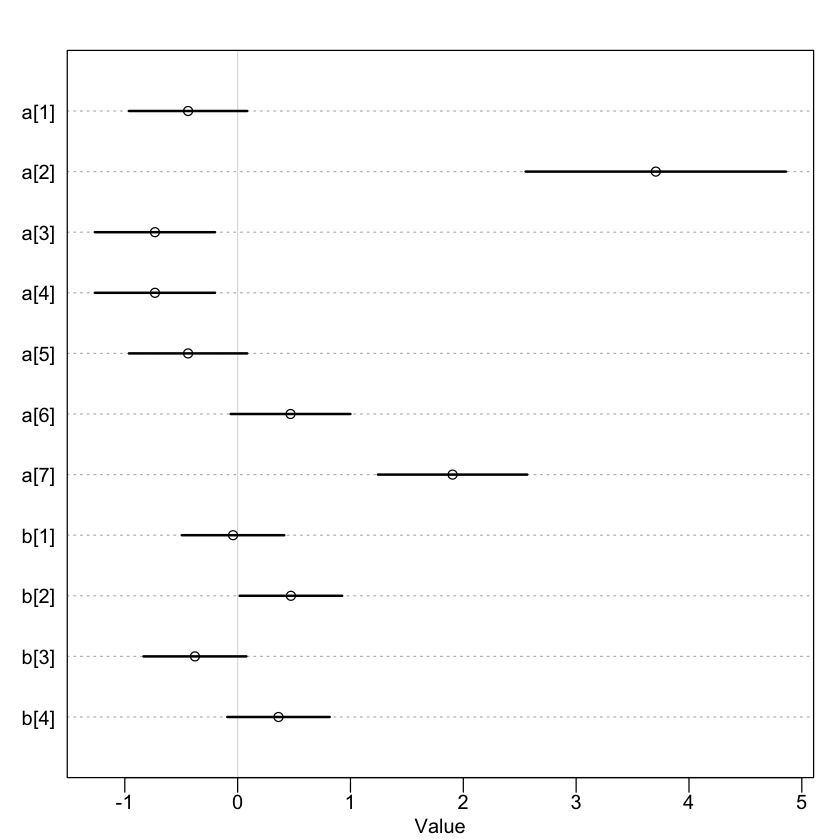

In [23]:
plot(precis(m11.4, depth=2))
plot(precis(m11.4_quap, depth=2))

Looks exactly the same

relax the requirement

In [24]:
m11.4_2 <- ulam(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 10 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list , chains=4 , log_lik=TRUE )

Warning message in readLines(hpp_path):
“incomplete final line found on '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T//RtmpsIfrDA/model-8fbf5b2d05b.hpp'”
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5b2d05b.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5b2d05b.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5b2d05b.stan', line 4, column 4: Dec

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.5 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

In [25]:
m11.4_quap_2 <- quap(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a[actor] + b[treatment] ,
        a[actor] ~ dnorm( 0 , 10 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=dat_list)

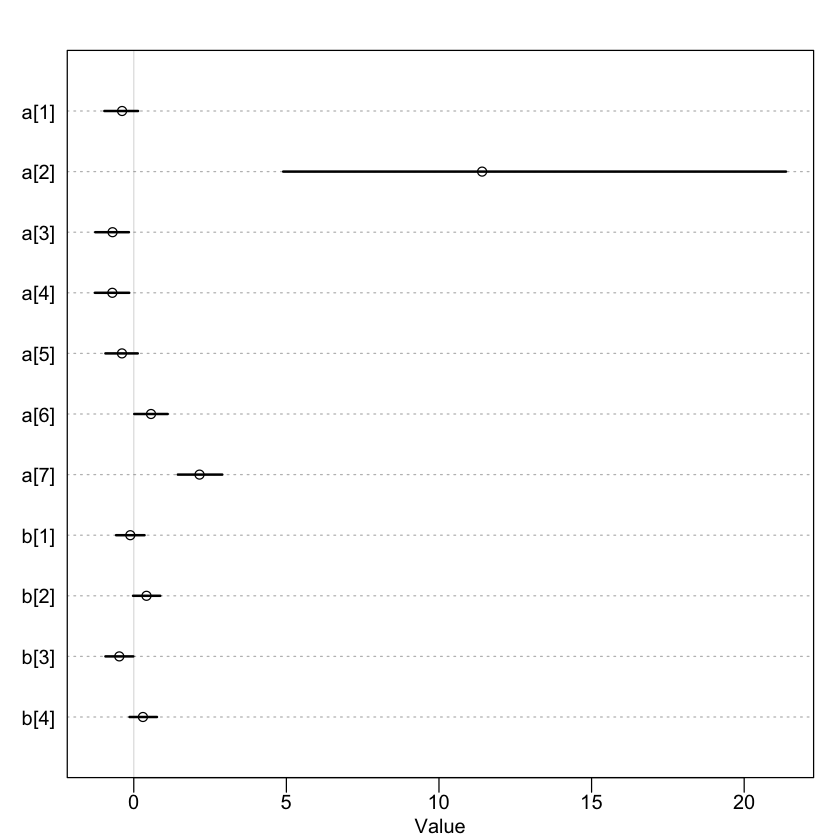

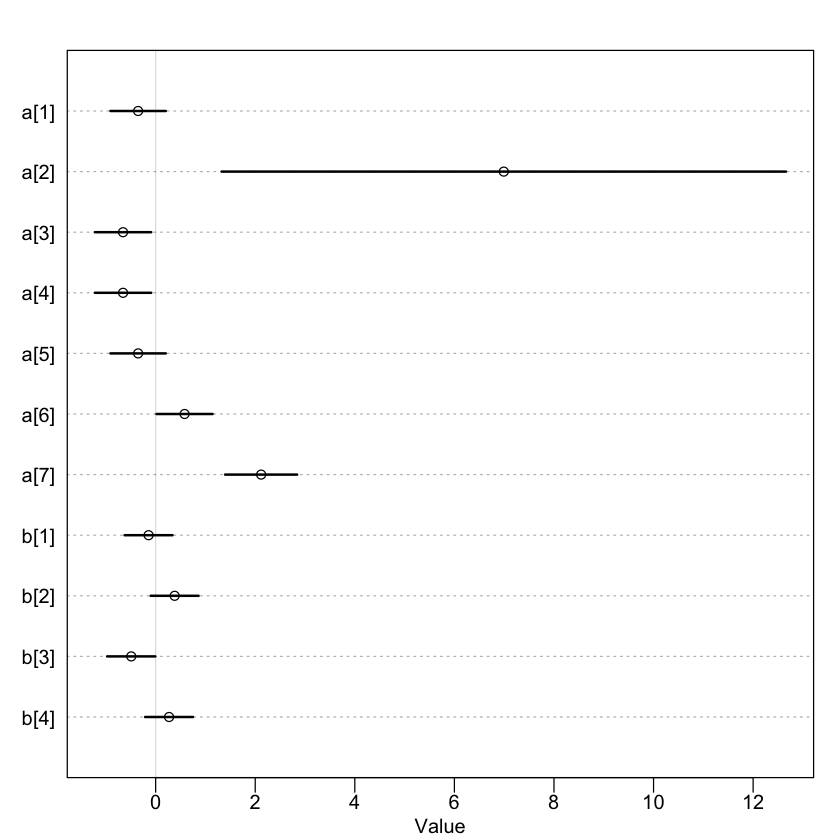

In [26]:
plot(precis(m11.4_2, depth=2))
plot(precis(m11.4_quap_2, depth=2))

In [27]:
precis(m11.4_2, depth=2)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.3833182,0.3391935,-0.96385198,0.14031468,561.5226,1.010519
a[2],11.4133634,5.2635914,4.89645130,21.36899650,783.1861,1.003888
a[3],-0.6953852,0.3438345,-1.26184275,-0.15900708,570.5825,1.013625
a[4],-0.7027025,0.3444558,-1.27368635,-0.14904589,610.8759,1.008690
a[5],-0.3870254,0.3281340,-0.92911497,0.13046327,546.5922,1.010659
a[6],0.5645890,0.3382481,0.01583708,1.11089110,588.2430,1.007212
a[7],2.1540456,0.4646779,1.44243900,2.89974235,776.6381,1.006956
b[1],-0.1138726,0.2895041,-0.57909144,0.35218542,486.0774,1.013124
b[2],0.4164070,0.2888592,-0.02396101,0.86808550,529.9786,1.013818


In [28]:
precis(m11.4_quap_2, depth=2)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.3520204,0.3477653,-0.90781650,0.20377570
a[2],6.9922834,3.5459548,1.32516278,12.65940403
a[3],-0.6546794,0.3537050,-1.21996839,-0.08939044
a[4],-0.6546797,0.3537051,-1.21996864,-0.08939067
a[5],-0.3520189,0.3477653,-0.90781499,0.20377716
a[6],0.5811571,0.3522748,0.01815393,1.14416032
a[7],2.1186233,0.4523594,1.39566557,2.84158098
b[1],-0.1418631,0.3011498,-0.62315870,0.33943242
b[2],0.3816099,0.3009912,-0.09943213,0.86265189


The differences increased. So now especially Actor 2 now are are off by a lot. This is mostly because quap is constrained to a Gaussian, but ulam isn't. We know that Actor 2 has a strong preference to left and never pulled right once. The data is extremely skewed, and Gaussian isn't good at dealing with that

## 11M8

Revisit the `data(Kline)`, this time drop Hawaii from the sample and refit the models. What changes do you observe?

In [29]:
data(Kline)
d <- Kline
d

culture,population,contact,total_tools,mean_TU
<fct>,<int>,<fct>,<int>,<dbl>
Malekula,1100,low,13,3.2
Tikopia,1500,low,22,4.7
Santa Cruz,3600,low,24,4.0
Yap,4791,high,43,5.0
Lau Fiji,7400,high,33,5.0
Trobriand,8000,high,19,4.0
Chuuk,9200,high,40,3.8
Manus,13000,low,28,6.6
Tonga,17500,high,55,5.4


In [30]:
d$P <- scale( log(d$population) )
d$contact_id <- ifelse( d$contact=="high" , 2 , 1 )

In [62]:
d2 <- d[d['culture']!='Hawaii', ]

In [63]:
d2

,culture,population,contact,total_tools,mean_TU,P,contact_id
,<fct>,<int>,<fct>,<int>,<dbl>,"<dbl[,1]>",<dbl>
1,Malekula,1100,low,13,3.2,-1.291473310,1
2,Tikopia,1500,low,22,4.7,-1.088550750,1
3,Santa Cruz,3600,low,24,4.0,-0.515764892,1
4,Yap,4791,high,43,5.0,-0.328773359,2
5,Lau Fiji,7400,high,33,5.0,-0.044338980,2
6,Trobriand,8000,high,19,4.0,0.006668287,2
7,Chuuk,9200,high,40,3.8,0.098109204,2
8,Manus,13000,low,28,6.6,0.324317564,1
9,Tonga,17500,high,55,5.4,0.518797917,2


In [64]:
dat <- list(
    T = d2$total_tools ,
    P = d2$P ,
    cid = d2$contact_id )

In [65]:
dat

-1.291473310
-1.088550750
-0.515764892
-0.328773359
-0.044338980
0.006668287
0.098109204
0.324317564
0.518797917


In [66]:
m11.9 <- ulam(
    alist(
        T ~ dpois( lambda ),
        log(lambda) <- a,
        a ~ dnorm( 3 , 0.5 )
    ), data=dat , chains=4 , log_lik=TRUE )


Warning message in readLines(hpp_path):
“incomplete final line found on '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T//RtmpsIfrDA/model-8fbf5b64e167.hpp'”
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5b64e167.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5b64e167.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc


Warning message in readLines(private$hpp_file_):
“incomplete final line found on '/var/folders/d7/f362skjd4nqdcwf

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

In [67]:
list(
    T = d$total_tools ,
    P = d$P ,
    cid = d$contact_id )

-1.291473310
-1.088550750
-0.515764892
-0.328773359
-0.044338980
0.006668287
0.098109204
0.324317564
0.518797917
2.321008320


In [78]:
m11.10 <- ulam(
    alist(
        T ~ dpois( lambda ),
        log(lambda) <- a[cid] + b[cid]*P,
        a[cid] ~ dnorm( 3 , 0.5 ),
        b[cid] ~ dnorm( 0 , 0.2 )
    ), data=list(
    T = d2$total_tools ,
    P = d2$P ,
    cid = d2$contact_id ) , chains=4 , log_lik=TRUE )

Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7923ebd2.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7923ebd2.stan', line 4, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Semantic error in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf7923ebd2.stan', line 15, column 8 to column 49:
   -------------------------------------------------
    13:      a ~ normal( 3 , 0.5 );
    14:      for ( i in 1:9 ) {
    15:         

ERROR: Error: An error occured during compilation! See the message above for more information.


For some reason this doesn't work but if I switch to P = d$P it works. I don't know why... based on [this](https://sr2-solutions.wjakethompson.com/generalized-linear-models.html#chapter-11) it seems that Hawaii was driving the slope between high and low contact

## 11H1

Use `WAIC` or `PSIS` to compare the chimpanzee model that includes a unique intercept for each actor, `m11.4` to teh simpler models fit in the same section. Interpret the results 

In [87]:
library(rethinking)
data(chimpanzees)
d <- chimpanzees

In [89]:
d$treatment <- 1 + d$prosoc_left + 2*d$condition

In [91]:
m11.3 <- quap(
    alist(
        pulled_left ~ dbinom( 1 , p ) ,
        logit(p) <- a + b[treatment] ,
        a ~ dnorm( 0 , 1.5 ),
        b[treatment] ~ dnorm( 0 , 0.5 )
    ) , data=d )

In [93]:
compare(m11.4, m11.3, func = WAIC)

Warning message in compare(m11.4, m11.3, func = WAIC):
“Not all model fits of same class.
This is usually a bad idea, because it implies they were fit by different algorithms.
Check yourself, before you wreck yourself.”


,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m11.4,531.1840,18.876869,0.0000,NA,7.981378,1.000000e+00
m11.3,682.2743,9.075381,151.0903,18.35883,3.513709,1.552935e-33


Great warning message. 

Warning message in compare(m11.4, m11.3, func = WAIC):
“Not all model fits of same class.
This is usually a bad idea, because it implies they were fit by different algorithms.
Check yourself, before you wreck yourself.”


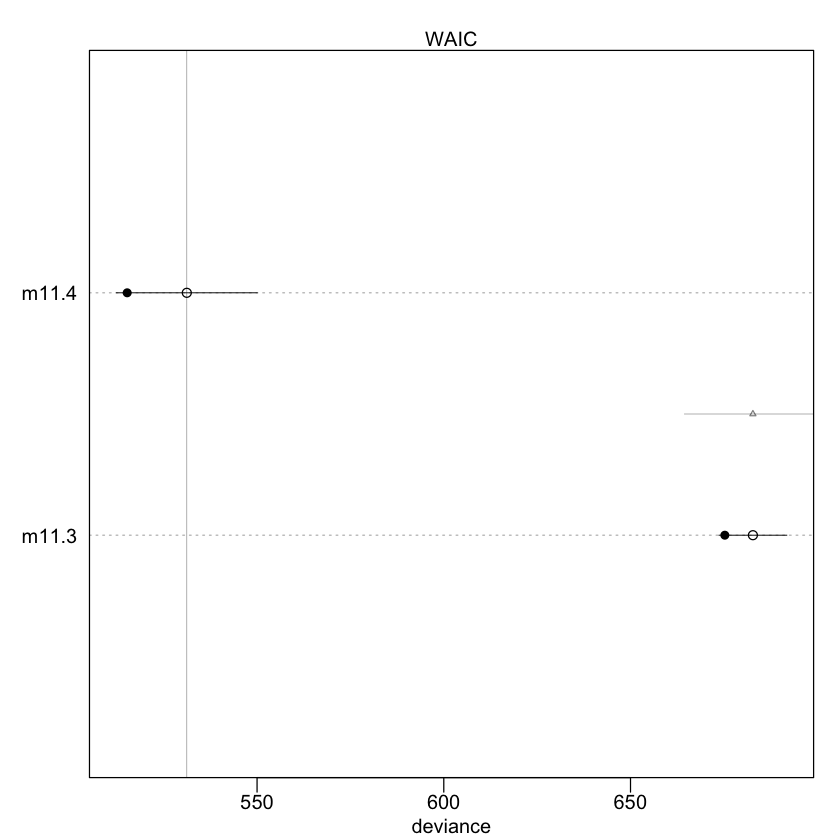

In [95]:
plot(compare(m11.4, m11.3, func = WAIC))

Looks like they are very different from each other. but WAIC says that the one with separate intercept works the best. Variations in individual chimpanzees are strong compared to just treatments

## 11H2

question is a bit long refer to the book...

In [96]:
library(MASS)

In [97]:
data(eagles)

In [98]:
d <- eagles

In [99]:
d

,y,n,P,A,V
,<int>,<int>,<fct>,<fct>,<fct>
1,17,24,L,A,L
2,29,29,L,A,S
3,17,27,L,I,L
4,20,20,L,I,S
5,1,12,S,A,L
6,15,16,S,A,S
7,0,28,S,I,L
8,1,4,S,I,S


In [100]:
d$P_ind <- ifelse( d$P=="L" , 1 , 0 )
d$A_ind <- ifelse( d$A=='A', 1, 0)
d$V_ind <- ifelse( d$V=='L', 1, 0)

In [101]:
d

,y,n,P,A,V,P_ind,A_ind,V_ind
,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,17,24,L,A,L,1,1,1
2,29,29,L,A,S,1,1,0
3,17,27,L,I,L,1,0,1
4,20,20,L,I,S,1,0,0
5,1,12,S,A,L,0,1,1
6,15,16,S,A,S,0,1,0
7,0,28,S,I,L,0,0,1
8,1,4,S,I,S,0,0,0


In [120]:
dat_list <- list(
    y = d$y,
    n = d$n,
    P = d$P_ind,
    V = d$V_ind,
    A = d$A_ind
    )

In [121]:
m_quap = quap(
    alist(
        y ~ dbinom(n, p),
        logit(p) <- a+b_p*P+b_v*V+b_a*A,
        a ~ dnorm(0, 1.5),
        b_p ~ dnorm(0, 0.5),
        b_v ~ dnorm(0, 0.5),
        b_a ~ dnorm(0, 0.5)
        ), data = dat_list)

In [122]:
m_ulam = ulam(
    alist(
        y ~ dbinom(n, p),
        logit(p) <- a+b_p*P+b_v*V+b_a*A,
        a ~ dnorm(0, 1.5),
        b_p ~ dnorm(0, 0.5),
        b_v ~ dnorm(0, 0.5),
        b_a ~ dnorm(0, 0.5)
        ), data = dat_list, chains = 4, log_lik = TRUE)

Warning message in readLines(hpp_path):
“incomplete final line found on '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T//RtmpsIfrDA/model-8fbf5ed286b5.hpp'”
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5ed286b5.stan', line 2, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5ed286b5.stan', line 3, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/var/folders/d7/f362skjd4nqdcwfmfwg636900000gp/T/RtmpsIfrDA/model-8fbf5ed286b5.stan', line 4, column 4:

Running MCMC with 4 sequential chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 5

In [123]:
precis(m_quap)

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
a,0.2934000,0.3681330,-0.2949477,0.8817476
b_p,1.6211033,0.3063637,1.1314749,2.1107316
b_v,-1.6729820,0.3191304,-2.1830141,-1.1629500
b_a,0.6518641,0.3054220,0.1637408,1.1399874


In [124]:
precis(m_ulam)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.2974940,0.3659106,-0.2918936,0.8813244,1052.652,1.0044293
b_p,1.6415409,0.3142498,1.1462468,2.1388084,1049.984,0.9998132
b_v,-1.6865428,0.3168347,-2.2123991,-1.1911095,1378.732,1.0022954
b_a,0.6641079,0.3070594,0.1760987,1.1527998,1237.230,0.9997171


Looks okay...

Now use ulam

In [125]:
p_post = link(m_ulam, data=dat_list)

In [126]:
p_mu <- apply(p_post, 2, mean)

In [146]:
p_ci <- apply(p_post, 2, HPDI)

In [147]:
p_ci

|0.89,0.6105602,0.8900175,0.4547878,0.8077292,0.2176869,0.6069646,0.1272354,0.4269909
0.89|,0.8006701,0.9630404,0.6708423,0.9326307,0.4443488,0.8298321,0.2899753,0.7066645


I am too lazy to figure out how to plot this...

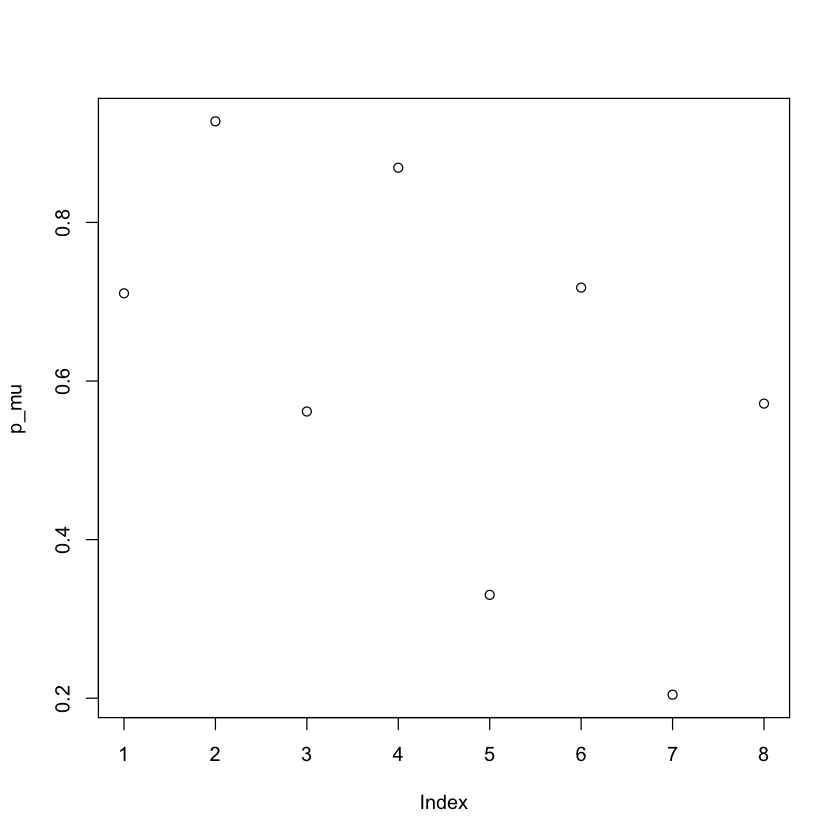

In [153]:
plot(p_mu)

Not sure how to plot the vertical bars...

but anyway this is for the p of success for each row just the HPDI isn't plotted, we also do have to inv_logit this, but it wasn't working code wise